In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [14]:
pred_data = pd.read_csv("prediction_ready.csv",parse_dates=["start_time"])
pred_data.head(1)

,start_time,month,day,hour,mean_duration,max_temp,precip,trips,isWeekday
0,2016-01-01,1.0,1.0,0.0,13.2,-4.4,0.0,25,0


In [34]:
#pick features
X_unscaled = pred_data[["month","day","hour","max_temp","precip","isWeekday"]]
y = pred_data["trips"].values.reshape([-1,1])

In [36]:
#scale data
scaler = StandardScaler()
X = scaler.fit_transform(X_unscaled)

In [121]:
#split into training (50%), verification (20%) and test (30%) set
X_train, X_test_meta, y_train, y_test_meta = train_test_split(X, y, test_size=0.5, random_state=0)
X_verification, X_test, y_verification, y_test = train_test_split(X_test_meta,y_test_meta, test_size=0.6, random_state=0)
pred_data["trips"].describe()

count    8784.000000
mean      407.050546
std       494.204738
min         0.000000
25%        39.000000
50%       202.000000
75%       616.000000
max      5110.000000
Name: trips, dtype: float64

In [38]:
# define Ridge-regression with polynomial features
def ridge(X,y,d,a):
    #create features
    PF = PolynomialFeatures(degree = d,interaction_only = False, include_bias = True)
    X_poly = PF.fit_transform(X)
    # create regression
    regression = Ridge(alpha = a, normalize = False, solver = 'lsqr')
    #fit
    regression.fit(X_poly,y)
    return regression, PF

In [43]:
# testrun regression
regression, PF = ridge(X_train,y_train,1,0)
X_test_poly = PF.transform(X_test)
print("MSE: "+str(mean_squared_error(y_test,regression.predict(X_test_poly))))
print("MAE: "+str(mean_absolute_error(y_test,regression.predict(X_test_poly))))
print("R^2: "+ str(r2_score(y_test,regression.predict(X_test_poly))))

MSE: 200486.05421897
MAE: 319.6925649864463
R^2: 0.20363261261140309


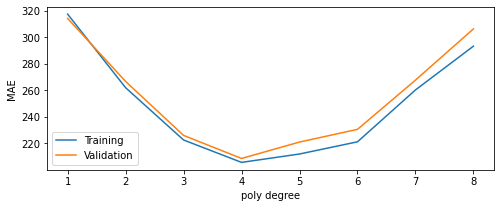

In [80]:
#get optimal hyperparameters from verification set
r_squ_train = []
r_squ_verification = []
mae_verification = []
mae_train = []

degree_space = np.linspace(1,8,8)
for degree in degree_space:
    regression, PF = ridge(X_train,y_train,int(degree),0)
    X_verification_poly = PF.transform(X_verification)
    
    r_squ_train.append(r2_score(y_train,regression.predict(PF.transform(X_train))))
    r_squ_verification.append(r2_score(y_verification,regression.predict(X_verification_poly)))

    mae_train.append(mean_absolute_error(y_train,regression.predict(PF.transform(X_train))))
    mae_verification.append(mean_absolute_error(y_verification,regression.predict(X_verification_poly)))
    
plt.figure(figsize = (8,3))
plt.plot(degree_space, mae_train)
plt.plot(degree_space, mae_verification)
plt.legend(["Training", "Validation"])
plt.xlabel("poly degree")
plt.ylabel("MAE")
plt.show()

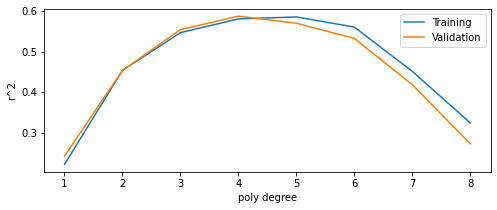

In [81]:
plt.figure(figsize = (8,3))
plt.plot(degree_space, r_squ_train)
plt.plot(degree_space, r_squ_verification)
plt.legend(["Training", "Validation"])
plt.xlabel("poly degree")
plt.ylabel("r^2")
plt.show()

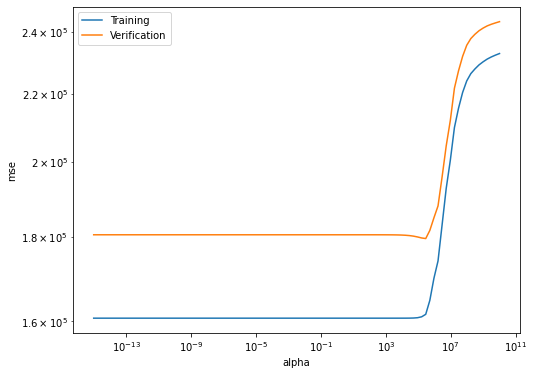

In [115]:
a_r_squ_train = []
a_r_squ_verification = []
a_mse_verification = []
a_mse_train = []

alpha_space = np.logspace(-15,10,100)
for alpha in alpha_space:
    regression, PF = ridge(X_train,y_train,8,alpha)
    X_verification_poly = PF.transform(X_verification)
    
    a_r_squ_train.append(r2_score(y_train,regression.predict(PF.transform(X_train))))
    a_r_squ_verification.append(r2_score(y_verification,regression.predict(X_verification_poly)))

    a_mse_train.append(mean_squared_error(y_train,regression.predict(PF.transform(X_train))))
    a_mse_verification.append(mean_squared_error(y_verification,regression.predict(X_verification_poly)))
    
plt.figure(figsize = (8,6))
plt.xscale("log")
plt.yscale("log")
plt.plot(alpha_space, a_mse_train)
plt.plot(alpha_space, a_mse_verification)
plt.legend(["Training", "Verification"])
plt.xlabel("alpha")
plt.ylabel("mse")
plt.show()

In [119]:
# choosen hyperparameters
regression, PF = ridge(X_train,y_train,4,0)
X_test_poly = PF.transform(X_test)
print("MSE: "+str(mean_squared_error(y_test,regression.predict(X_test_poly))))
print("MAE: "+str(mean_absolute_error(y_test,regression.predict(X_test_poly))))
print("R^2: "+ str(r2_score(y_test,regression.predict(X_test_poly))))

MSE: 114493.03601642376
MAE: 210.40602309798027
R^2: 0.5452126567017817


In [118]:
# choosen hyperparameters
regression, PF = ridge(X_train,y_train,8,100000)#maybe more than 8
X_test_poly = PF.transform(X_test)
print("MSE: "+str(mean_squared_error(y_test,regression.predict(X_test_poly))))
print("MAE: "+str(mean_absolute_error(y_test,regression.predict(X_test_poly))))
print("R^2: "+ str(r2_score(y_test,regression.predict(X_test_poly))))

MSE: 185930.45108241437
MAE: 300.04406241840866
R^2: 0.26145013855793997
